In [1]:
import numpy as np

import torch

from segmentation_models_pytorch.losses import DiceLoss
from segmentation_models_pytorch import UnetPlusPlus

In [2]:
model_pred_path = '../models/baseline_efficientnet_b5_512_unetplusplus_no_augs/predictions_8.pth'
model_pred_path_2 = '../models/baseline_efficientnet_b6_512_unet++_bce_8_31/predictions_4.pth'
model_pred_path_3 = '../models/baseline_efficientnet_b6_512_unet++_bce_6/predictions_9.pth'

In [3]:
predictions = torch.load(model_pred_path, map_location='cpu')
predictions_2 = torch.load(model_pred_path_2, map_location='cpu')
predictions_3 = torch.load(model_pred_path_3, map_location='cpu')

In [4]:
predictions['all_masks'].flatten(0, 1).shape

torch.Size([1856, 256, 256])

In [5]:
N = 1854

In [6]:
masks = predictions_3['all_masks'].squeeze().flatten(0, 1)[:N, :, :]
#all_preds = torch.nn.Sigmoid()(predictions['all_preds']).squeeze().flatten(0, 1)[:N, :, :]
#all_preds = (all_preds > predictions['best_th']).to(int)


all_preds_2 = torch.nn.Sigmoid()(predictions_2['all_preds']).squeeze().flatten(0, 1)[:N, :, :]
#all_preds_2 = (all_preds_2 > predictions_2['best_th']).to(int)
all_preds_3 = torch.nn.Sigmoid()(predictions_3['all_preds']).squeeze().flatten(0, 1)[:N, :, :]


all_preds = (all_preds_3 + all_preds_2)/2#(all_preds + all_preds_2) / 2.

In [85]:
for i in range(N):
    if masks[i, :, :].sum() == 0:
        all_preds[i, :, :] *= 0

In [11]:
dl = DiceLoss(mode='binary', from_logits=False)


In [7]:
import matplotlib.pyplot as plt

In [8]:
from sklearn.cluster import DBSCAN

In [54]:
for i in range(1000):
    mask_ = masks[i].detach().numpy()
    if mask_.sum() > 100:
        break

In [56]:
mask_ = np.stack([mask_, mask_, mask_], axis=2)*255.
mask_ = mask_.astype(np.uint8)


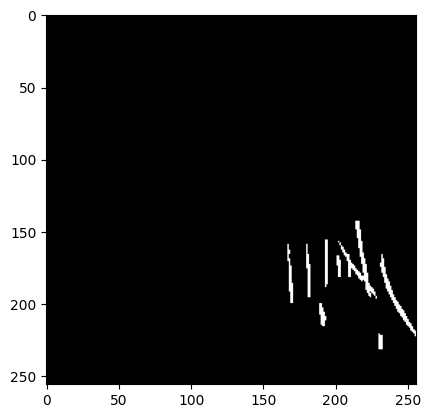

In [57]:
plt.imshow(mask_)

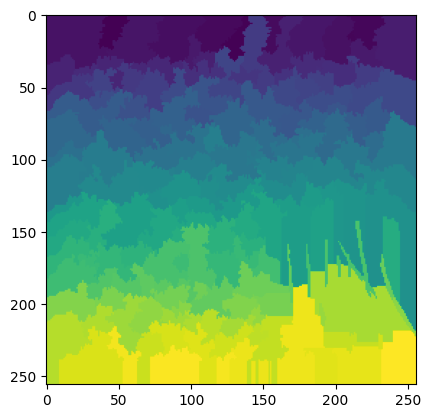

In [58]:
from skimage.segmentation import quickshift as qs
from skimage import data, segmentation, color
#from skimage.future import graph
from matplotlib import pyplot as plt

#img = #cv2.imread('images/lane.jpg')
img = mask_#cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = qs(img, convert2lab=True)

plt.imshow(img)
plt.show()

In [63]:
import numpy as np
import cv2 as cv
img = mask_#cv.imread('home.jpg')
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

In [64]:
ret

0.0

In [65]:
ret

0.0

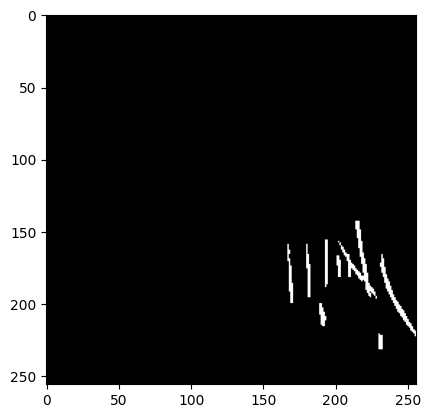

In [66]:
plt.imshow(res2)

In [13]:
import cv2 as cv


# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 6
ret,label,center=cv.kmeans(mask_,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((mask_.shape))
#cv.imshow('res2',res2)
#cv.waitKey(0)
#cv.destroyAllWindows()

error: OpenCV(4.8.0) /io/opencv/modules/core/src/kmeans.cpp:242: error: (-215:Assertion failed) data0.dims <= 2 && type == CV_32F && K > 0 in function 'kmeans'


In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

img = mask_#cv2.imread('images/lane.jpg')

Z = np.float32(img.reshape((-1,1)))
db = DBSCAN(eps=0.3, min_samples=100).fit(Z[:,:2])

plt.imshow(np.uint8(db.labels_.reshape(img.shape[:2])))
plt.show()

: 

: 

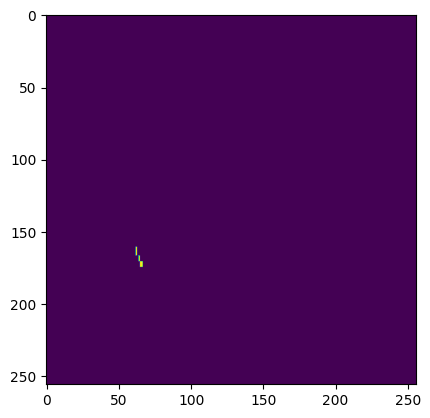

In [ ]:
plt.imshow(res2)

In [107]:
center.shape

(3, 256)

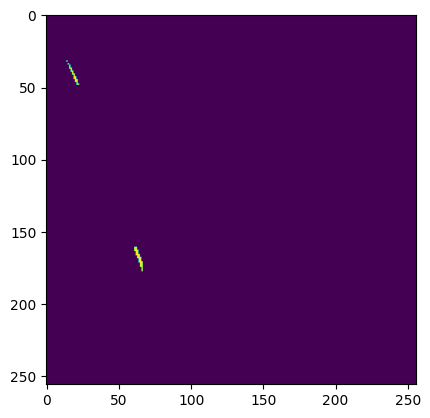

In [96]:
plt.imshow(masks[0])a

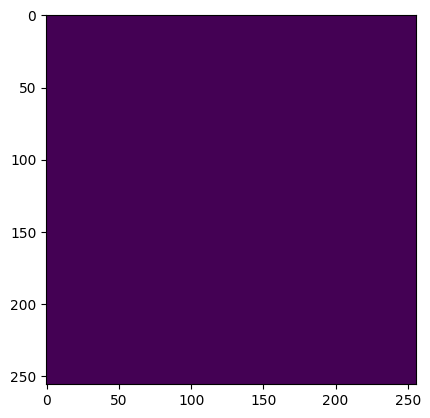

In [95]:
plt.imshow(all_preds[0] > 0.53)

In [12]:
def get_ths(all_preds, all_masks):
    all_preds_sigmoid = torch.nn.Sigmoid()(all_preds)
    
    ths, losses = [], []
    for th in np.linspace(0.05, 1.01, 25):
        all_preds_cur = (all_preds_sigmoid > th).to(int)
        cur_loss = dl(all_preds_cur, all_masks)
        
        ths.append(th)
        losses.append(cur_loss.item())
        
    return ths, losses

In [17]:
ths, losses = get_ths(all_preds_2, masks)

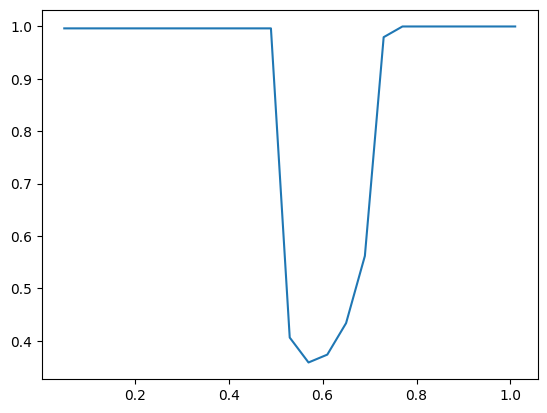

In [18]:
plt.plot(ths, losses)

In [37]:
import json
import pandas as pd

In [38]:
with open('../data/ssd_data/vanilla_data/train_metadata.json', 'r') as r:
    json_file = json.loads(r.read())

In [39]:
df_train_meta = pd.DataFrame.from_dict(json_file)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

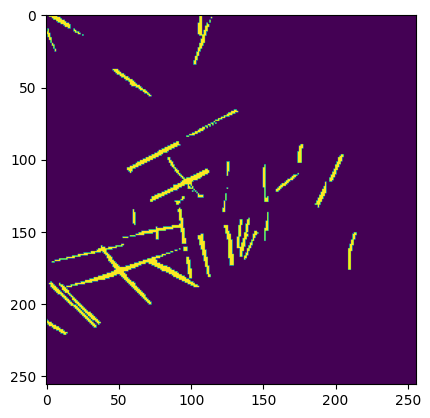

In [9]:
plt.imshow(np.load('../data/ssd_data/vanilla_data/train/1108741208571075/human_pixel_masks.npy'))

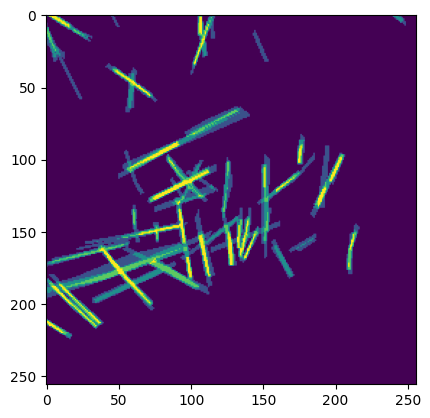

In [8]:
plt.imshow(np.load('../data/ssd_data/vanilla_data/train/1108741208571075/human_individual_masks.npy').mean(axis=3))

In [6]:
import pandas as pd

In [7]:
pd.read_parquet('../data/duplicates_0.05_64.parquet')

,name_1,name_2,distance
0,343058252569925183,6830123620193930567,0.029613
1,1825629728807105688,4154642065670413160,0.046380
2,9152634346866479724,6335243444348995186,0.045645
3,2639396010826458451,6314692322565474952,0.047282
4,3349810674487960286,8598038864497349320,0.045853
...,...,...,...
63,347767725293715254,8609966224058370974,0.039522
64,7462048363218767785,9076130989936157987,0.028569
65,7462048363218767785,6817467262876524844,0.030250
66,6505156722168834278,6335243444348995186,0.048131


In [8]:
import numpy as np
import pandas as pd
import os

def to_ashcolor(record_dir, mask=False):
    def normalize_range(data, bounds):
        """Maps data to the range [0, 1]."""
        return (data - bounds[0]) / (bounds[1] - bounds[0])
    
    def get_false_color(record_data):
        __T11_BOUNDS = (243, 303)
        _CLOUD_TOP_TDIFF_BOUNDS = (-4, 5)
        _TDIFF_BOUNDS = (-4, 2)
    
        N_TIMES_BEFORE = 4

        r = normalize_range(record_data["band_15"] - record_data["band_14"], _TDIFF_BOUNDS)
        g = normalize_range(record_data["band_14"] - record_data["band_11"], _CLOUD_TOP_TDIFF_BOUNDS)
        b = normalize_range(record_data["band_14"], __T11_BOUNDS)
        false_color = np.clip(np.stack([r, g, b], axis=2), 0, 1)
        img = false_color[..., N_TIMES_BEFORE]
        return img
    
    record_dir = os.path.join('../data/ssd_data/vanilla_data/train', record_dir)
        
    record_data = {}
    record_data['band_11'] = np.load(os.path.join(record_dir, 'band_11.npy'))
    record_data['band_14'] = np.load(os.path.join(record_dir, 'band_14.npy'))
    record_data['band_15'] = np.load(os.path.join(record_dir, 'band_15.npy'))

    false_color = get_false_color(record_data)
    
    if mask:
        mask = np.load(os.path.join(record_dir, 'human_pixel_masks.npy'))
        return false_color, mask

    else:
        return false_color    

In [19]:
df_train_meta['central_meridian'] = df_train_meta.projection_wkt.apply(lambda x : x[347:351])
df_train_meta.central_meridian = df_train_meta.central_meridian.apply(lambda x : x.replace(']',''))
df_train_meta.central_meridian = pd.to_numeric(df_train_meta.central_meridian)

In [4]:
imgs_ = []

for i in tqdm(imgs):
    cur_img = cv2.resize(to_ashcolor(i), (64, 64))
    imgs_.append(cur_img)

100%|██████████| 20529/20529 [05:23<00:00, 63.40it/s]


In [5]:
imgs_s = np.stack(imgs_)

In [48]:
dists = np.abs(imgs_s - imgs_s[8]).mean(axis=(1, 2, 3))

In [54]:

for i in tqdm(range(20000)):
    dists = np.abs(imgs_s - imgs_s[i]).mean(axis=(1, 2, 3))
    #if np.sort(dists)[1] < 0.05:
        #print(i) 

 12%|█▏        | 2396/20000 [13:36<1:39:36,  2.95it/s]

 12%|█▏        | 2402/20000 [13:39<1:44:18,  2.81it/s]

In [49]:
np.argsort(dists)

array([    8, 13854,  5773, ..., 10487,  3685, 11015])

In [50]:
np.sort(dists)

array([0.        , 0.02576011, 0.02655154, ..., 0.6131355 , 0.6284588 ,
       0.62939507], dtype=float32)

In [161]:
dists = []
i_ref = 0

ref_img = imgs_[i_ref]

for j in tqdm(range(len(imgs_))):
    dists.append(np.mean(np.abs(ref_img - imgs_[j])))

100%|██████████| 20529/20529 [00:36<00:00, 564.52it/s]


In [172]:
np.sort(dists)

array([0.     , 0.03143, 0.04764, ..., 0.4265 , 0.4282 , 0.4365 ],
      dtype=float16)

In [162]:
np.argsort(dists)[:]

array([    0,   844, 14431, 19241, 13342,  5324, 19872,  5517, 20049,
       11151])

In [56]:
df = pd.read_parquet('../data/duplicates_0.05_64.parquet')


In [60]:
df[df.distance < 0.035]

,name_1,name_2,distance
0,343058252569925183,6830123620193930567,0.029613
2,7640558979184660490,4238768254906524095,0.025760
3,7640558979184660490,3485799802374325746,0.026552
13,9152634346866479724,622913812295158575,0.027847
14,9152634346866479724,1712061492321574250,0.031614
...,...,...,...
17661,3207801328843970688,7084070321957865995,0.030894
17662,3207801328843970688,1177139966922815871,0.031159
17674,31584822796368266,2713094026919797628,0.033842
17682,1140226628604936967,3853294022406288837,0.030616


In [45]:
df_meta = df_train_meta[['record_id', 'timestamp']]
df_meta.columns = ['name_1', 'timestamp1']
df_meta2 = df_meta.copy()
df_meta2.columns = ['name_2', 'timestamp2']

In [47]:
df = df.merge(df_meta, how='inner', on='name_1').merge(df_meta2, how='inner', on='name_2')

In [48]:
df['delta'] = df['timestamp1'] - df['timestamp2']

In [23]:
ash_color1, mask1 = to_ashcolor('3207801328843970688', mask=True)
ash_color2, mask2 = to_ashcolor('7084070321957865995', mask=True)

In [24]:
import matplotlib.pyplot as plt

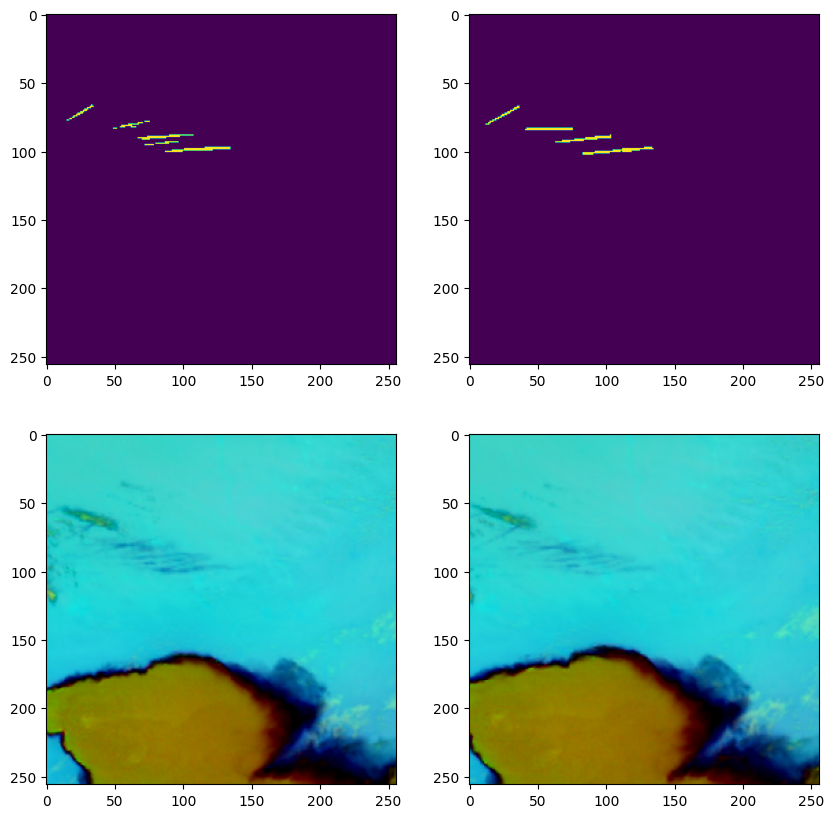

In [25]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(mask1)

plt.subplot(2, 2, 2)
plt.imshow(mask2)

plt.subplot(2, 2, 3)
plt.imshow(ash_color1)

plt.subplot(2, 2, 4)
plt.imshow(ash_color2)

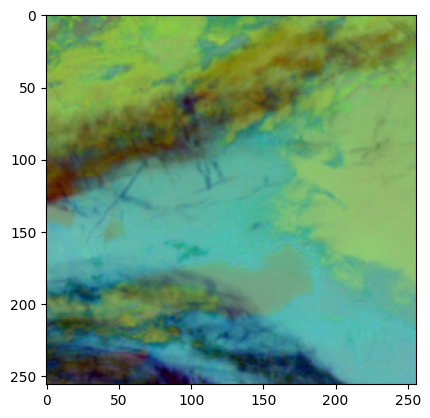

In [85]:
plt.imshow(ash_color1)

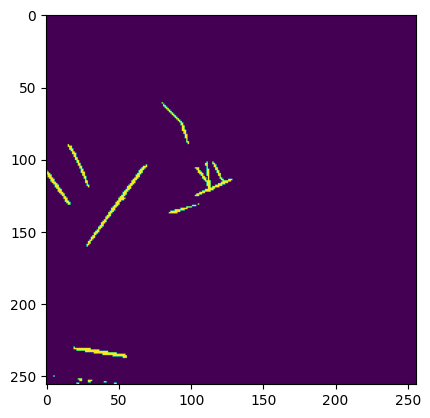

In [93]:
plt.imshow(mask2)

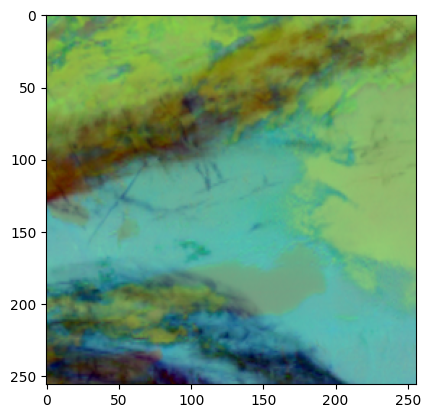

In [86]:
plt.imshow(ash_color2)

In [22]:
df_train_meta[df_train_meta.central_meridian == -51]

,record_id,projection_wkt,row_min,row_size,col_min,col_size,timestamp,central_meridian
0,3283699311323360356,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",1686563.50,-1960.975830,371650.937500,1947.130737,1.571009e+09,-51
9,999343676223888149,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",3678525.75,-1964.313843,249157.265625,1955.102417,1.571635e+09,-51
12,4390543925742222249,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",-2294273.50,-1953.334961,285798.781250,1960.335815,1.556808e+09,-51
19,7453454703072928537,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",3186158.75,-1994.684937,469920.156250,1922.926880,1.568215e+09,-51
23,2993624572135136191,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",4193656.25,-2040.084473,581341.875000,1884.855835,1.581012e+09,-51
...,...,...,...,...,...,...,...,...
20336,8504315722518804873,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",4686622.50,-2019.999756,439334.781250,1906.786011,1.571155e+09,-51
20372,1492498632489915244,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",3186158.75,-1994.684937,469920.156250,1922.926880,1.567886e+09,-51
20418,7861505887704906463,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",4193656.25,-2040.084473,581341.875000,1884.855835,1.574059e+09,-51
20502,9181800856501212297,"PROJCS[""unknown"",GEOGCS[""unknown"",DATUM[""WGS_1...",-1300586.00,-1940.960083,406781.781250,1968.195190,1.581259e+09,-51
